# EDA Part 2: Looking at Two-Variables

# Scatterplots

So far, you have looked at exploring one variable at a time through summary statistics, histograms, boxplots, etc.

What do you do when you have more than one numeric variable? You can start by visualizing the relationship between the variables through a scatterplot.

A scatterplot can provide a quick view of the general relationship between variables. On a scatterplot, each point corresponds to a single observation.

## Things to Look for in a Scatterplot:

1. **Direction of Association:** Positive or Negative
2. **Form of Association:** Linear? Curved? Neither?
3. **Strength of Association**
4. **Outliers**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the `auto-mpg.csv` dataset and look at the first 5 rows with the `pandas` `.head()` method.

In [3]:
cars = pd.read_csv('../data/auto-mpg.csv')

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


You want to see the relationship between horsepower and engine size (displacement). First make sure these are both numeric variables and don't contain null values. You can use the `pandas` `.info()` method to check both of these things.

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


You can see that displacement is a floating point decimal (float64). You can also see that horsepower is an object - python's designation for a string or textual data. You need to convert horsepower to a numeric data type. You will also need to drop the eight rows where horsepower is null.

In [6]:
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [7]:
cars = cars.dropna()

Now you are ready to plot your scatterplot!

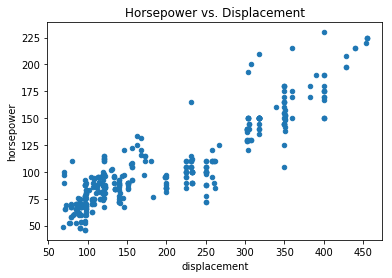

In [8]:
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower')
plt.title('Horsepower vs. Displacement');

What we see is a fairly strong positive association between displacement and horsepower. Cars with greater engine displacement tend to also have larger horsepower. Also, this is a linear trend, meaning you could draw a straight line to describe the association.

If you want to bring in an additional variable, such as number of cylinders to see how it is related to the first two, you can do so by using seaborn to color the points, using the `hue` argument.

In [9]:
import seaborn as sns

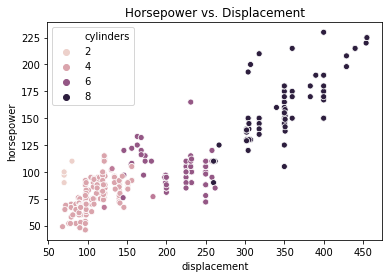

In [10]:
sns.scatterplot(data = cars, x = 'displacement', y = 'horsepower', hue = 'cylinders')
plt.title('Horsepower vs. Displacement');

In [11]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

This scatterplot shows that cars with fewer cylinders tend to have lower displacement and horsepower values.

There are a few cars that are somewhat far from the general trend. Let's investigate. We can accomplish this by slicing the dataframe. This is done by adding a set of square brackets including the conditions we are using to slice the data.

Notice that if you are specifying multiple conditions, you must place each condition inside a set of parentheses and separate them with an ampersand &. In this context, the & means "and". In the event that you want to slice based on an "or" condition, you can use the pipe |.

In [12]:
cars[(cars['displacement'] < 350) & (cars['horsepower'] > 175)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d


These three vehicles are all large trucks.

There is a single 6-cylinder vehicle that stands out since it has higher horsepower than other cars with its displacement value. Investigate this car.

In [13]:
cars[(cars['displacement'] < 250) & (cars['horsepower'] > 150)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
263,17.7,6,231.0,165.0,3445,13.4,78,1,buick regal sport coupe (turbo)


Next, create a scatterplot to take a look at the relationship between horsepower and the cars fuel efficiency (mpg).

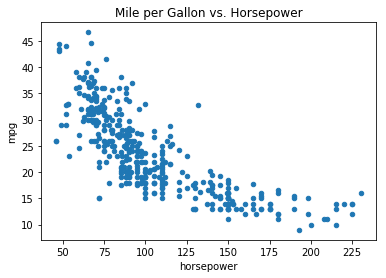

In [14]:
cars.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')
plt.title('Mile per Gallon vs. Horsepower');

As you can see, there is a negative association between horsepower and mpg, meaning that cars with greater horsepower tend to get worse gas mileage.

This trend appears to be slightly curved when compared to the previous trend.

Also, there is at least one point that stand out from the normal trend: the point with more than 125 horsepower and more than 30 mpg. Let's investigate this point.

In [15]:
cars[(cars['horsepower'] > 125) & (cars['mpg'] > 30)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx


Next, take a look at the relationship between weight and acceleration.

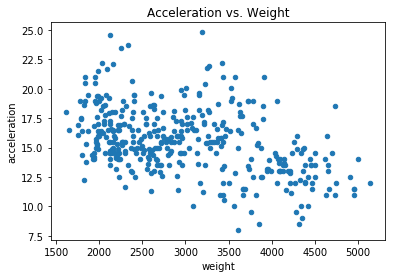

In [16]:
cars.plot(kind = 'scatter', x = 'weight', y = 'acceleration')
plt.title('Acceleration vs. Weight');

Here, there appears to be a negative linear association, but this association is much weaker than the previous associations.

You have seen fairly strong associations between horsepower and displacement and between horsepower and mpg, and a seemingly weaker one between weight and acceleration. What if you want to quantify that relationship?

## Covariance

For a dataset $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ we define the **covariance** as

$$cov(X, Y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

where $\bar{x}$ is the mean of the $x_i$'s and $\bar{y}$ is the mean of the $y_i$'s.

To calculate the covariance of the dataset, you can use the `cov` function from `numpy`. This will return the *covariance matrix*, which shows the variance of each variable separately along with the covariance between variables.

In [17]:
import numpy as np

In [18]:
np.cov(cars['displacement'], cars['horsepower'])

array([[10950.36755409,  3614.03374393],
       [ 3614.03374393,  1481.56939297]])

The covariance is what is located in the upper right and the lower left entries.

So what does this measure?

Take a look at your scatterplot again. This time add a vertical line to show the mean value for displacement(plotted along the horizontal axis) and a horizontal line to show the mean value of horsepower (plotted along the vertical axis).

In [19]:
displacement_mean = cars['displacement'].mean()
horsepower_mean = cars['horsepower'].mean()

In [20]:
from matplotlib.patches import Rectangle

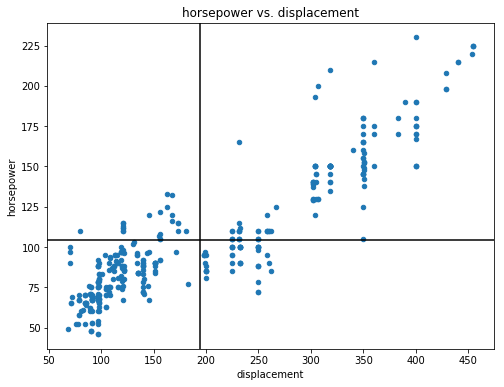

In [21]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement');

Let's analyze the four quadrants that have been determined by partitioning at the average values. Starting with the upper left quadrant.

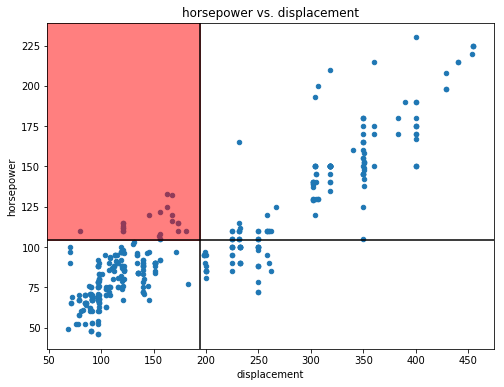

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement')
r1 = Rectangle((plt.xlim()[0], horsepower_mean), displacement_mean - plt.xlim()[0], plt.ylim()[1] - horsepower_mean, color='red', alpha = 0.5)
ax.add_artist(r1);

Points in the upper left quadrant have lower than average displacement and higher than average horsepower. Thus, $(x_i - \bar{x})(y_i - \bar{y})$ will be a negative number times a positive number, so negative overall.

Next take a look at the lower right quadrant.

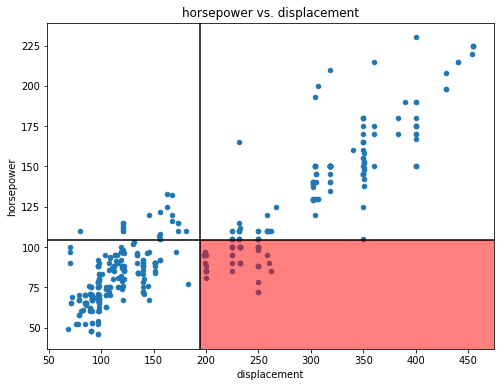

In [46]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement')
r1 = Rectangle((displacement_mean, plt.ylim()[0]), plt.xlim()[1] - displacement_mean, horsepower_mean - plt.ylim()[0], color='red', alpha = 0.5)
ax.add_artist(r1);

For points in the lower right, where horsepower is below average and displacement is above average, $(x_i - \bar{x})(y_i - \bar{y})$ will also be negative.

Next, focus on the lower left quadrant, where both displacement and horsepower are below the mean.

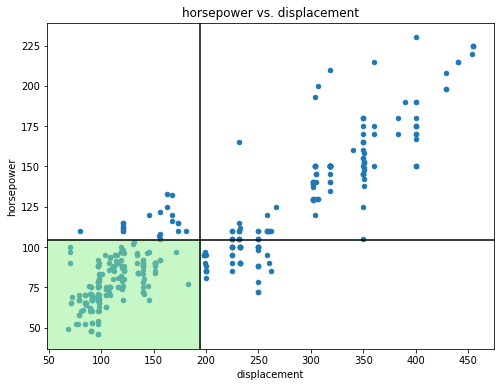

In [47]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement')
r1 = Rectangle((plt.xlim()[0], plt.ylim()[0]), displacement_mean - plt.xlim()[0], horsepower_mean - plt.ylim()[0], color='lightgreen', alpha = 0.5)
ax.add_artist(r1);

Points in the lower left quadrant have lower than average displacement and lower than average horsepower. Thus, $(x_i - \bar{x})(y_i - \bar{y})$ will be a positive number times a positive number, so positive overall.

Finally, take a look at the upper left quadrant.

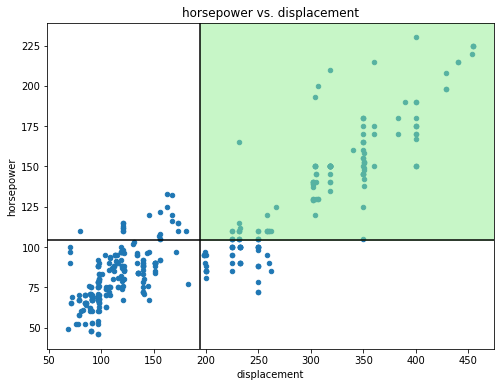

In [48]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement')
r1 = Rectangle((displacement_mean, horsepower_mean), plt.xlim()[1] - displacement_mean, plt.ylim()[1] - horsepower_mean, color='lightgreen', alpha = 0.5)
ax.add_artist(r1);

For points in the upper right quadrant, $(x_i - \bar{x})(y_i - \bar{y})$ will be positive.

If you have more points in the lower left and upper right, when finding the covariance, you will be adding a lot of positive numbers, so the outcome is likely to be positive.

If you have more points in the upper left and lower right, when calculating the covariance, you will be adding a lot of negative numbers, so the outcome is likely to be negative.

These two scenarios correspond to a positive trend and a negative trend, respectively.

On the other hand, if points are roughly evenly spread around the four quadrants (no trend), then when finding the covariance, you will be adding a lot of both positive and negative values, so overall, the covariance will be close to zero.

Let's look at this in another way. First look at observations with below-average displacement.

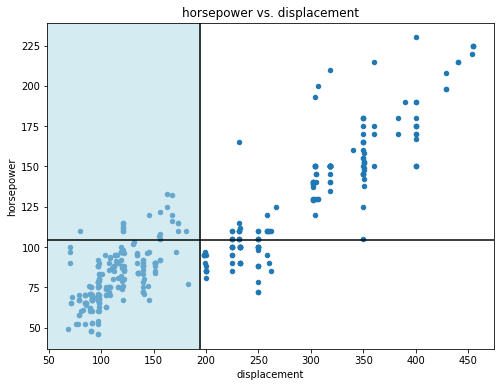

In [52]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement')
r1 = Rectangle((plt.xlim()[0], plt.ylim()[0]), displacement_mean - plt.xlim()[0], plt.ylim()[1] - plt.ylim()[0], color='lightblue', alpha = 0.5)
ax.add_artist(r1);

Notice that most observations with below-average displacement will also have below-average horsepower.

Now, look at points that have above-average displacement.

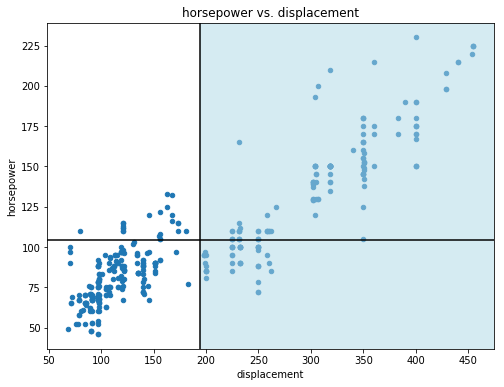

In [54]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement')
r1 = Rectangle((displacement_mean, plt.ylim()[0]), plt.xlim()[1] - displacement_mean, plt.ylim()[1] - plt.ylim()[0], color='lightblue', alpha = 0.5)
ax.add_artist(r1);

Notice that most points with above-average displacement also have above-average horsepower.

This is another way to understand covariance. 

**Positive covariance** between variables $a$ and $b$ means that observations with above-average values for $a$ tend to also have above-average values for $b$ and vice versa.

**Negative covariance** between variables $a$ and $b$ means that observations with above-average values for $a$ tend to have below-average values for $b$ and vice versa.

You can check this using the horsepower and mpg variables.

In [58]:
np.cov(cars['horsepower'], cars['mpg'])

array([[1481.56939297, -233.85792578],
       [-233.85792578,   60.91814187]])

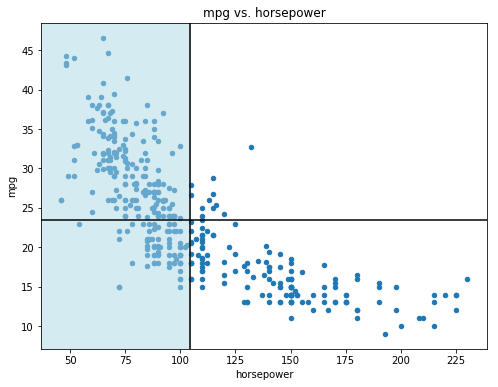

In [55]:
horsepower_mean = cars['horsepower'].mean()
mpg_mean = cars['mpg'].mean()

fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'horsepower', y = 'mpg', ax = ax)
plt.axvline(x = horsepower_mean, color = 'black')
plt.axhline(y = mpg_mean, color = 'black')
plt.title('mpg vs. horsepower')
r1 = Rectangle((plt.xlim()[0], plt.ylim()[0]), horsepower_mean - plt.xlim()[0], plt.ylim()[1] - plt.ylim()[0], color='lightblue', alpha = 0.5)
ax.add_artist(r1);

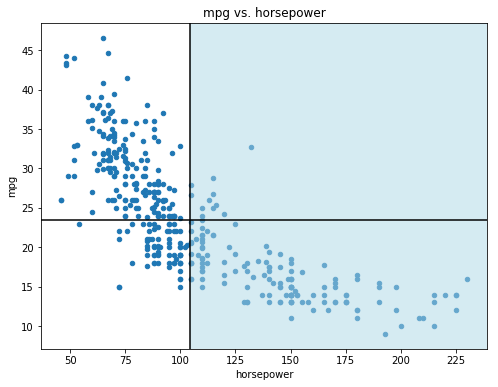

In [56]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'horsepower', y = 'mpg', ax = ax)
plt.axvline(x = horsepower_mean, color = 'black')
plt.axhline(y = mpg_mean, color = 'black')
plt.title('mpg vs. horsepower')
r1 = Rectangle((horsepower_mean, plt.ylim()[0]), plt.xlim()[1] - horsepower_mean, plt.ylim()[1] - plt.ylim()[0], color='lightblue', alpha = 0.5)
ax.add_artist(r1);

By examining the sign and the magnitude of the covariance, you can get an idea of the existence or nonexistence of a trend in the data. But there is one major drawback, which is that the magnitude of $(x_i - \bar{x})$ and $(y_i - \bar{y})$ depends on the measurement scale of the variables. In this case, you are measuring these difference in displacement and horsepower units (and so when you multiply them, you have displacement units $\cdot$ horsepower units).

A better approach would be to standardize these differences, so that you get a unitless measure of trend. This is exactly what the correlation does.

## (Pearson) Correlation

How can you normalize these differences? The most common way to do it is to convert it into units of standard deviations (by dividing the absolute differences by the standard deviation).

$$ r = \frac{\sum_{i=1}^n \frac{(x_i - \bar{x})}{s_X}\frac{(y_i - \bar{y})}{s_Y}}{n-1} = \frac{cov(X,Y)}{s_X \cdot s_Y} $$

Again, to find the correlation coefficient, we can use `numpy`.

In [59]:
np.corrcoef(cars.displacement, cars.horsepower)

array([[1.      , 0.897257],
       [0.897257, 1.      ]])

This shows that the correlation between displacement and horsepower is roughly 0.897.

The correlation will always be between -1 and 1, where higher magnitudes (further from zero in either direction) signify a stronger association and the sign determines whether it is a positive or negative association.

This table give a rule of thumb for assessing the strength of a relationship based on the correlation.

| $r$  | interpretation  |
|---|---|
| 1  | Perfect positive relationship  |
| 0.8  | Strong positive relationship  |
| 0.5 | Moderate positive relationship  |
| 0.2 | Weak positive relationship |
| 0 | No linear relationship |
| -0.2 | Weak negative relationship |
| -0.5 | Moderate negative relationship |
| -0.8 | Strong negative relationship |
| -1 | Perfect negative relationship |


The following interactive plot can be used to see what different levels of correlation look like.

In [63]:
from ipywidgets import interact, FloatSlider

@interact(corr = FloatSlider(value = 0.8, min = -1, max = 1, step = 0.01, continuous_update = False))
def make_corr_plot(corr):
    xx = np.array([0, 1])
    yy = np.array([0, 1])
    means = [xx.mean(), yy.mean()]  
    stds = [xx.std() / 3, yy.std() / 3]
    corr = corr       # correlation
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
            [stds[0]*stds[1]*corr,           stds[1]**2]] 

    m = np.random.multivariate_normal(means, covs, 1000).T
    fig, ax = plt.subplots(figsize = (8,6))
    plt.scatter(m[0], m[1])
    plt.title('Correlation = {:.2f}'.format(corr))
    ax.axis('equal');

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='corr', max=1.0, min=-1.0, s…

The Pearson correlation measures the strength of a *linear* relationship between variables. That is, how strongly they follow a line. If you want to see this trendline, you can use the polyfit method from numpy. You'll learn much more about this trendline when we talk about linear regression later in the course.

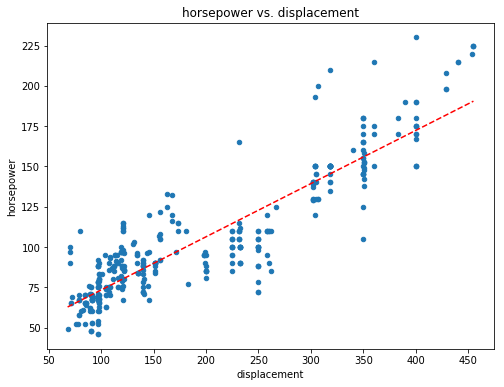

In [23]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)

x = np.linspace(cars['displacement'].min(), cars['displacement'].max(), 100)
z = np.polyfit(cars['displacement'], cars['horsepower'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('horsepower vs. displacement');

**Caution:** the correlation coefficient that you have encountered so far only measures the strength of a *linear* relationship. It is possible that two variables can have a strong *nonlinear* relationship that cannot be detected by using the correlation coefficient. It is advisable to always plot your variables against each other rather than just relying on the correlation coefficient.

For example, the following variables have a very strong relationship. In fact, there is a formula to find the value of $y$ based on the value of $x$.

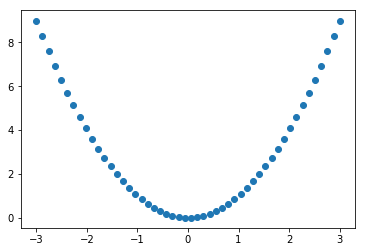

In [24]:
x = np.linspace(start = -3, stop = 3, num=50)
y = x**2

plt.scatter(x,y);

However, you won't get very far trying to detect this relationship using the correlation coefficient, which in this case is essentially 0.

In [25]:
np.corrcoef(x,y)

array([[ 1.00000000e+00, -1.00846554e-16],
       [-1.00846554e-16,  1.00000000e+00]])

You can also inspect multiple relationships at once using `pandas`.

In [26]:
cars[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'weight']].corr()

,mpg,cylinders,displacement,horsepower,acceleration,weight
mpg,1.000000,-0.777618,-0.805127,-0.778427,0.423329,-0.832244
cylinders,-0.777618,1.000000,0.950823,0.842983,-0.504683,0.897527
displacement,-0.805127,0.950823,1.000000,0.897257,-0.543800,0.932994
horsepower,-0.778427,0.842983,0.897257,1.000000,-0.689196,0.864538
acceleration,0.423329,-0.504683,-0.543800,-0.689196,1.000000,-0.416839
weight,-0.832244,0.897527,0.932994,0.864538,-0.416839,1.000000


To find the correlation between any two variables, find the intersection of the row and column for those variables.

For example, the correlation between weight and acceleration is -0.417.

It appears that the strongest relationship is between cylinders and displacement.

Because cylinders is a discrete variable, a scatterplot of cylinders vs displacement has points only at each discrete value of cylinder and not continuously along the horizontal axis. 

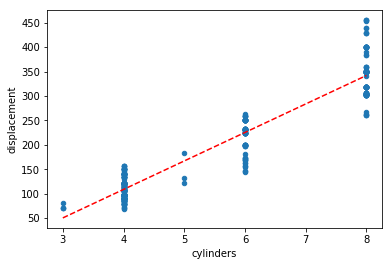

In [27]:
cars.plot(kind = 'scatter', x = 'cylinders', y = 'displacement')
x = np.linspace(cars['cylinders'].min(), cars['cylinders'].max(), 100)
z = np.polyfit(cars['cylinders'], cars['displacement'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

Note that the type of correlation discussed above is called Pearson's correlation coefficient. It is what is most commonly referred to by the term "correlation", but it is not the only correlation measure. For a discussion of other types of correlations and appropriate use cases of these, see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/.

# Exploring Categorical-Numeric Relationships

In [28]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


The cars dataset includes a categorical variable, the model year. Note that while year is a number, in this context it is not a measurement. Instead, it is a grouping variable, making it categorical.

In `pandas`, if we want to explore categorical vs numeric variables, we usually do it by using `groupby`. To groupby, you need to specify the column(s) to group on, followed by the column you want to aggregate, and finally an aggregation type.

Let's say we want a basic count of cars by year.
* groupby: model year
* column to aggregate: car name (can really use any column here)
* aggregation: count

In [29]:
cars.groupby('model year')['car name'].count()

model year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: car name, dtype: int64

We can feed the result of our groupby into a plot.

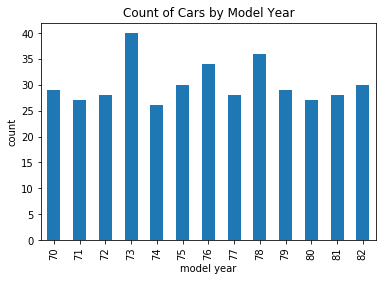

In [30]:
cars.groupby('model year')['car name'].count().plot(kind = 'bar')
plt.title('Count of Cars by Model Year')
plt.ylabel('count');

However, we are not just limited to counting. We can apply any sort of aggregation we want. For example, let's say we want to see the average mpg by year.

* groupby: model year
* column to aggregate: mpg
* aggregation: mean

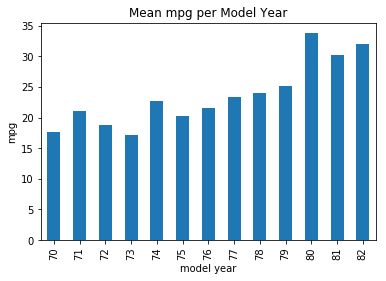

In [31]:
cars.groupby('model year')['mpg'].mean().plot(kind = 'bar')
plt.title('Mean mpg per Model Year')
plt.ylabel('mpg');

It appears that there is a gradual upward trend in mpg over the years.

While the above plot gives some idea about how mpg has changed over the years, it is only giving a single snapshot per year. A boxplot, which you saw in the last set of slides gives a more complete picture since it shows the overall distribution of mpg values per year. A boxplot shows not just the average value but can reveal the something about the spread of values in a given year.

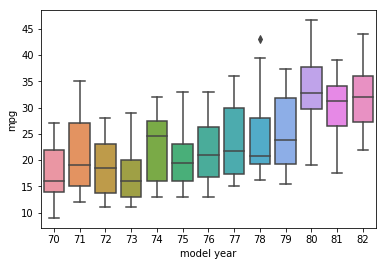

In [32]:
sns.boxplot(data = cars, x = 'model year', y = 'mpg');

## Categorical-Categorical

When studying two categorical variables, you can perform *cross-tabulation* to see how the sample is distributed across the categories.

For this example, you'll look at data from the 2018 Central Park Squirrel Census, which can be obtained from https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw.

In [33]:
squirrels = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


Let's say you are interested in seeing if squirrels of different colors behave differently around humans. You'll be looking specifically at the `Primary Fur Color` and `Runs from` column, which indicates "Squirrel was seen running from humans, seeing them as a threat." You'll be using the `pandas` `crosstab` function for this.

In [34]:
pd.crosstab(squirrels['Primary Fur Color'], squirrels['Runs from'])

Runs from,False,True
Primary Fur Color,,
Black,71,32
Cinnamon,305,87
Gray,1922,551


By default, `crosstab` will return counts, which can give an idea about the relative size of each group, but makes it difficult to assess exact proportions. Luckily, you can normalize your measurements to give relative proportions by specifying the `normalize` argument. To normalize across rows, you can specify `normalize = 'index'`.

In [35]:
pd.crosstab(squirrels['Primary Fur Color'], squirrels['Runs from'], normalize='index')

Runs from,False,True
Primary Fur Color,,
Black,0.689320,0.310680
Cinnamon,0.778061,0.221939
Gray,0.777194,0.222806


Based on this, you can see that a larger proportion of black squirrels run from humans than other colors of squirrels.

You can visualize your findings using a side-by-side barplot.

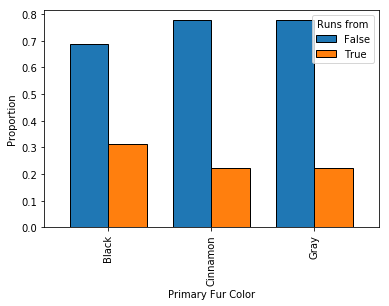

In [36]:
pd.crosstab(squirrels['Primary Fur Color'],
            squirrels['Runs from'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75)
plt.ylabel('Proportion');

Or you can show them in a stacked bar plot.

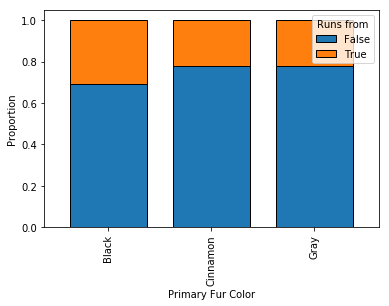

In [37]:
pd.crosstab(squirrels['Primary Fur Color'], 
            squirrels['Runs from'], 
            normalize='index').plot(kind = 'bar', 
                                    edgecolor = 'black', 
                                    width = 0.75,
                                    stacked = True)
plt.ylabel('Proportion');